# Data exploration

## Data cleaning

In [3]:
######################################### Data Exploration #########################################
import seaborn as sns
sns.set(color_codes=True) 
from scipy import stats
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

hr = pd.read_csv('hr.csv', sep=',')

# Retrieve features
X = hr.iloc[:,1:] 
# Retriving Target Variable
y = hr.iloc[:,0]

y = [ 1 if x=='Yes' else 0 for x in y ]


for i in range(1470):
    if X['BusinessTravel'][i]=='Non-Travel':
        X['BusinessTravel'][i]=0
    elif X['BusinessTravel'][i]=='Travel_Rarely':
        X['BusinessTravel'][i]=1
    elif X['BusinessTravel'][i]=='Travel_Frequently':
        X['BusinessTravel'][i]=2


        
for i in range(1470):
    if X['JobRole'][i]=='Manager':
        X['JobRole'][i]=X['Department'][i]+' '+X['JobRole'][i]
        
print(X['JobRole'])

0                      Sales Executive
1                   Research Scientist
2                Laboratory Technician
3                   Research Scientist
4                Laboratory Technician
5                Laboratory Technician
6                Laboratory Technician
7                Laboratory Technician
8               Manufacturing Director
9            Healthcare Representative
10               Laboratory Technician
11               Laboratory Technician
12                  Research Scientist
13               Laboratory Technician
14               Laboratory Technician
15              Manufacturing Director
16                  Research Scientist
17               Laboratory Technician
18                       Sales Manager
19                  Research Scientist
20              Manufacturing Director
21                Sales Representative
22                   Research Director
23                  Research Scientist
24                  Research Scientist
25      Research & Develo

In [4]:
import numpy as np
X['BusinessTravel'] = X['BusinessTravel'].astype(np.int)

In [5]:
# Drop the Department column
X= X.drop('Department', 1)
X= X.drop('DailyRate',1)
X= X.drop('MonthlyRate',1)
X= X.drop('HourlyRate',1)
# Empty list to store columns with categorical data
categorical = []
for col, value in X.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = X.columns.difference(categorical)

X_cat = X[categorical]
X_cat = pd.get_dummies(X_cat)
X_cat.head(3)

X = pd.concat([X[numerical], X_cat], axis=1)

X = X[["Education", "MonthlyIncome", "JobInvolvement","JobLevel","NumCompaniesWorked","StockOptionLevel","TotalWorkingYears", 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Human Resources Manager',
 'JobRole_Laboratory Technician',
 'JobRole_Manufacturing Director',
 'JobRole_Research & Development Manager',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Manager',
 'JobRole_Sales Representative']]











In [9]:
X.columns.values.tolist()

['Education',
 'MonthlyIncome',
 'JobInvolvement',
 'JobLevel',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'TotalWorkingYears',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Human Resources Manager',
 'JobRole_Laboratory Technician',
 'JobRole_Manufacturing Director',
 'JobRole_Research & Development Manager',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Manager',
 'JobRole_Sales Representative']

In [20]:
X.skew()

Age                                        0.413286
BusinessTravel                             0.082428
DistanceFromHome                           0.958118
Education                                 -0.289681
EnvironmentSatisfaction                   -0.321654
JobInvolvement                            -0.498419
JobLevel                                   1.025401
JobSatisfaction                           -0.329672
MonthlyIncome                              1.369817
NumCompaniesWorked                         1.026471
PercentSalaryHike                          0.821128
PerformanceRating                          1.921883
RelationshipSatisfaction                  -0.302828
StockOptionLevel                           0.968980
TotalWorkingYears                          1.117172
TrainingTimesLastYear                      0.553124
WorkLifeBalance                           -0.552480
YearsAtCompany                             1.764529
YearsInCurrentRole                         0.917363
YearsSinceLa

## Data transformation

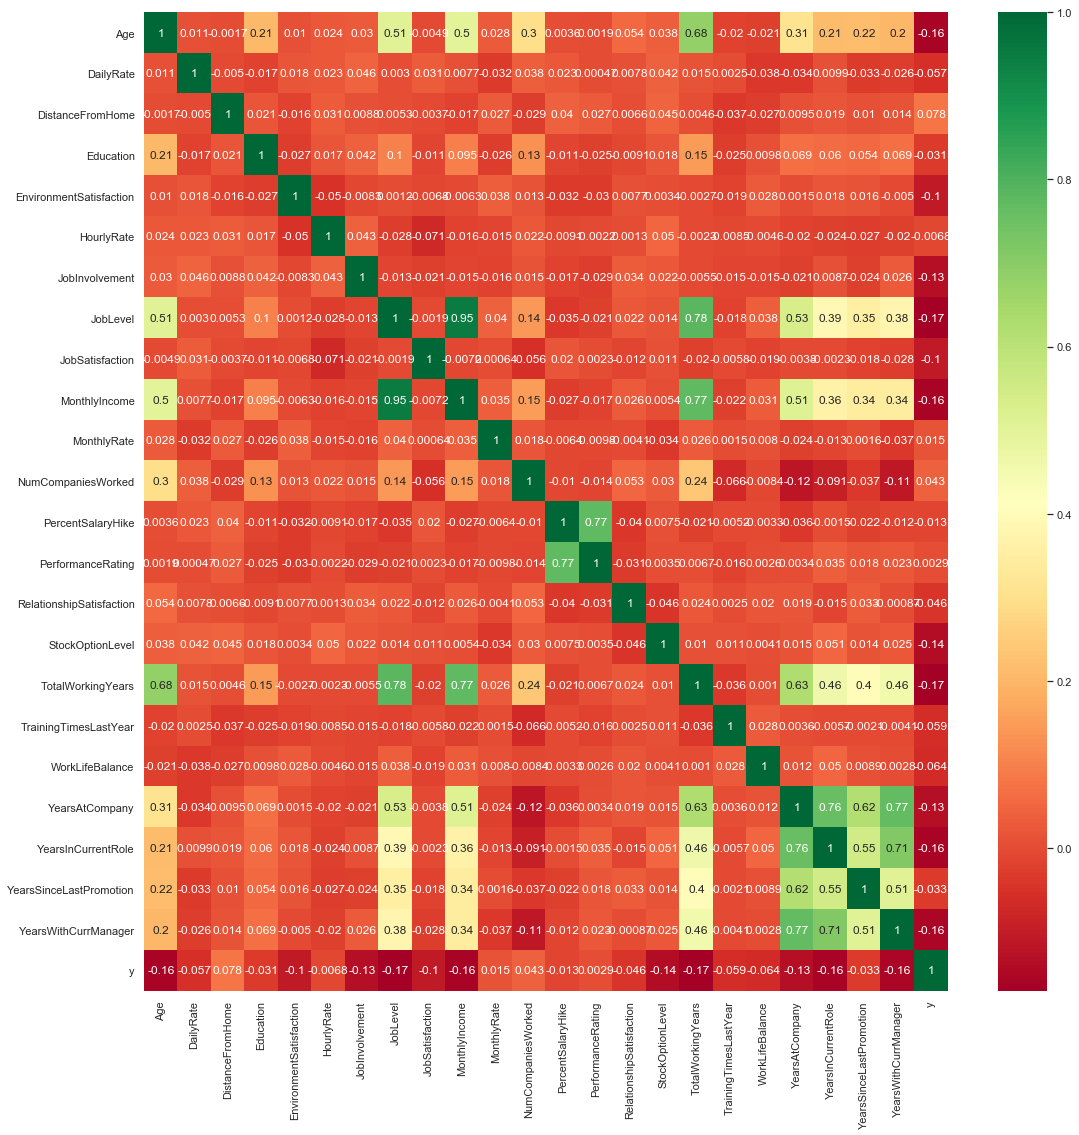

In [46]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

y1 = pd.DataFrame(y,columns=list("y"))
data = pd.concat([X,y1], axis=1)
corrmatrix = data.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(18,18))
plot = sns.heatmap(data[top_correlated_features].corr(),annot=True,cmap="RdYlGn")

## Feature selection

In [61]:
#################################### feature selection using l1 ########################################
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# lr = LogisticRegression(penalty='l1', C=1.0)
# lr.fit(X_train, y_train)
# print('Training accuracy:', lr.score(X_train, y_train))
# print('Test accuracy:', lr.score(X_test, y_test))

Training accuracy: 0.8960155490767736
Test accuracy: 0.873015873015873


In [62]:
#lr.coef_

array([[-2.16873141e-02,  8.80099536e-01, -1.27267135e-04,
         3.85956280e-02,  1.04032771e-01, -3.60151783e-01,
         6.63553372e-04, -4.36059041e-01,  0.00000000e+00,
        -3.40482134e-01,  1.90591962e-02,  1.40126942e-05,
         2.37928631e-01,  6.41498824e-03, -5.37291974e-02,
        -1.71463110e-01, -9.83877740e-02, -1.01270754e-01,
        -1.10922535e-01, -2.86232599e-01,  1.13287798e-01,
        -1.81479832e-01,  1.41208237e-01, -8.58357852e-02,
         6.39863926e-01, -1.52291175e-01,  3.78019864e-01,
        -9.09013972e-03,  0.00000000e+00,  1.00654768e+00,
         0.00000000e+00,  4.72820142e-01, -9.11006160e-01,
         5.84949683e-01,  0.00000000e+00,  8.73443027e-01,
         0.00000000e+00,  0.00000000e+00, -9.35344879e-01,
         0.00000000e+00,  3.08162428e-01,  0.00000000e+00,
         1.13604472e+00, -2.41169304e-01,  2.18510732e-01,
         1.27015481e+00,  0.00000000e+00,  2.00480535e+00]])

In [63]:
# itemindex = np.where(lr.coef_ != 0)
# #itemindex[1]
# X1 = X.iloc[:,itemindex[1]]
# X1
# X=X1


In [10]:
#X[['TotalWorkingYears']] = np.sqrt(X[[
#    'TotalWorkingYears']])
#X[['YearsSinceLastPromotion']] = np.log(X[['YearsSinceLastPromotion']]+1/3)

## Data balancing

In [6]:
#We import numpy become using numpy arrays to index is essential to this task.
#We define our variables here to match the notation provided by the examples

import numpy as np
X_imb = X
y_imb = np.asarray(y)


from sklearn.utils import resample

# Resampling strategy = take the minority class from the imbalanced data set and repeatedly draw samples
# from it until it contains the same number of samples as class label 0

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], # Indexable data-structures as input
                                    y_imb[y_imb == 1],
                                    replace=True, # Implements resampling with replacement.
                                    n_samples=X_imb[y_imb == 0].shape[0], # Number of samples to generate.
                                    random_state=123) # The seed of the pseudo random number generator to use when shuffling the data


# After resampling, we can stack the original class 0 with the upsampled class 1 subset to obtain a balanced dataset
# as follows:

y = np.asarray(y)

X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

print(X_bal.shape)
print(y_bal.shape)


(2466, 24)
(2466,)


# Model tuning

## Data standardization

In [7]:
from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler


#

#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)


sc1 = StandardScaler()
sc1.fit(X_bal)
X_balstd=sc1.transform(X_bal)

## Logistic regression

In [13]:
############################ Logistic Regression Parameter Tuning ############################

from sklearn.tree import DecisionTreeClassifier # A decision tree classifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
# import warnings to remove warnings in the output area
import warnings
warnings.filterwarnings('ignore')

inner_cv = KFold(n_splits=10, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True,random_state=44)

#part 1
gs_lr1 = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_lr1 = gs_lr1.fit(X_balstd,y_bal)
print("\n LR Parameter Tuning trial 1")
print("Non-nested CV f1: ", gs_lr1.best_score_)
print("Optimal Parameter: ", gs_lr1.best_params_)
print("Optimal Estimator: ", gs_lr1.best_estimator_)
nested_score_gs_lr1 = cross_val_score(gs_lr1, X=X_balstd, y=y_bal, cv=outer_cv)
print("Nested CV f1:",nested_score_gs_lr1.mean(), " +/- ", nested_score_gs_lr1.std())


 LR Parameter Tuning trial 1
Non-nested CV f1:  0.6867105768974765
Optimal Parameter:  {'C': 0.01, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Nested CV f1: 0.6864632619131743  +/-  0.029524328263646957


## Decision tree

In [14]:
############################## Decision Tree Parameter Tuning ##############################

gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[2,3,4,5,6,7],
                              'min_samples_split':[2,3,4,5,6,7],'min_impurity_decrease':[0,0.1,0.01,0.001,0.0001,0.00001]}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_dt2 = gs_dt2.fit(X_balstd,y_bal)
print("\n Decision Tree Parameter Tuning")
print("Non-nested CV f1: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X_balstd, y=y_bal, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())


 Decision Tree Parameter Tuning
Non-nested CV f1:  0.9096384467110232
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV f1:  0.9013736730498183  +/-  0.02437215285531163


## k-NN

In [25]:
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(metric='minkowski'),
                  param_grid=[{'p':np.arange(1,6,1),
                      'n_neighbors': [2,3,4,5,6,7,8,9,10],
                               'weights':['uniform','distance']}],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=-1)

gs_knn2 = gs_knn2.fit(X_balstd,y_bal)  
print("\n k-NN Parameter Tuning")
print("Non-nested CV f1: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) 
#nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X_balstd, y=y_bal, cv=outer_cv)
#print("Nested CV f1: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 k-NN Parameter Tuning
Non-nested CV f1:  0.9263471880055247
Optimal Parameter:  {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=1,
           weights='distance')


In [26]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model to all the data
clf_knn = neighbors.KNeighborsClassifier(metric='minkowski',n_neighbors=2,p=1,weights='distance')
scores_f1=cross_val_score(clf_knn, X_balstd, y_bal, cv=outer_cv, scoring='f1')
print("F1-score: %0.16f (+/- %0.16f)" % (scores_f1.mean(), scores_f1.std() * 2))

F1-score: 0.9262245016391921 (+/- 0.0278744662929176)


## ROC curve

10-fold cross validation:

ROC AUC: 0.743 (+/- 0.027) [Logistic regression]
ROC AUC: 0.920 (+/- 0.016) [Decision tree]
ROC AUC: 0.927 (+/- 0.009) [kNN]


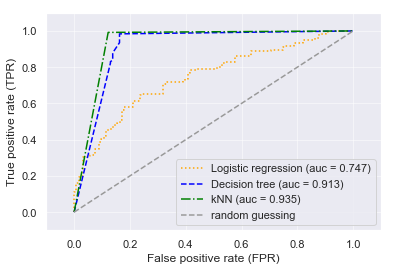

In [11]:
############################### Import Libraries & Modules #################################

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

######################################## Classifiers ########################################

# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=42)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=2,
                              random_state=42)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=1,
                            metric='minkowski')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')

###################################### Split the dataset ######################################

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.10, random_state=42)
sc2 = StandardScaler()
sc2.fit(X_train)
X_train_std = sc2.transform(X_train)
X_test_std = sc2.transform(X_test)

for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X_balstd,
                             y=y_bal,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train_std,
                     y_train).predict_proba(X_test_std)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend


plt.plot([0, 1], # plot random guessing classifier
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
plt.legend(loc='lower right') 

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Profit curve

In [56]:
#Cost assumptions
'''Cost of FP: 1, cost of FN: 2, cost of TN: 0, cost of TP: -1'''
cost_TP = 2500000; cost_FP = 750000; cost_FN = 0; cost_TN = 0;
cb_matrix = np.array([[cost_TP, cost_FP],[cost_FN, cost_TN]])

In [41]:
#Convert to standard confusion matrix
def standard_confusion_matrix(y_true, y_predict):
    TP = sum((y_true == 1) & (y_predict == 1))
    TN = sum((y_true == 0) & (y_predict == 0))
    FP = sum((y_true == 0) & (y_predict == 1))
    FN = sum((y_true == 1) & (y_predict == 0))
    
    return np.array([[TP,FP],[FN,TN]])

In [42]:

def profit_curve(cb, predict_probas, labels):
    #predict_probas = round(predict_probas,4)
    indices = np.argsort(predict_probas)
    sorted_probs = predict_probas[indices]
    sorted_labels = labels[indices]
    
    profit_list = []
    
    for sp, sl in zip(sorted_probs, sorted_labels):
        predict_labels = sorted_probs > sp + .0001
        conf_mat = standard_confusion_matrix(sorted_labels, predict_labels)
        profit_list.append((cb * conf_mat).sum() / float(len(labels)))
    return profit_list, sorted_probs

In [43]:
# Plot the profit curves
def plot_profit_curve(model, label, costbenefit, X_train, X_test, y_train, y_test, col):
    model.fit(X_train, y_train)
    predict_probas = model.predict_proba(X_test)[:,1]
    profit_list, sorted_probs = profit_curve(costbenefit, predict_probas, y_test)
    max_index = np.argmax(profit_list)
    max_threshold = sorted_probs[max_index]
    max_profit = profit_list[max_index]
    
    plt.plot(sorted_probs, profit_list, label=label, color=col, linewidth=3)
    plt.plot(max_threshold, max_profit, '.', color=col, markersize=18)

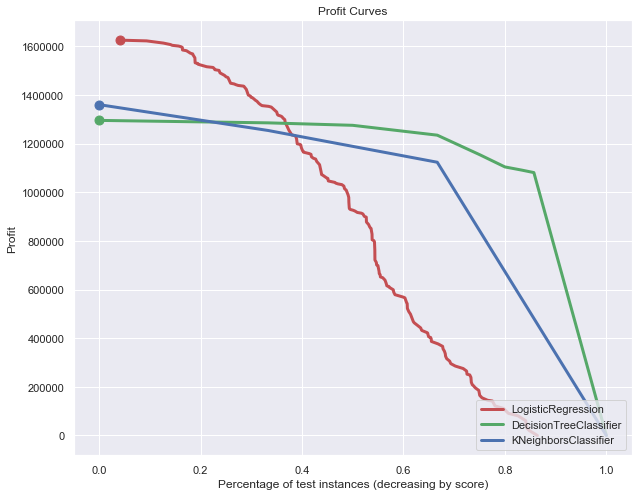

In [59]:

models = [LogisticRegression(penalty='l2', 
                          C=0.01,
                          random_state=42), DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              min_samples_leaf=2,
                              min_samples_split=2,
                              random_state=42), KNeighborsClassifier(n_neighbors=3,
                            p=3,
                            metric='minkowski')]
fig = plt.figure(figsize=(10,8))
all_clf = [clf1, clf2, clf3]
# fig.set_facecolor('#F2F2F2')
colors = ['r', 'g', 'b']
for i, model in enumerate(models):
    plot_profit_curve(model, model.__class__.__name__, cb_matrix,
                      X_train_std, X_test_std, y_train, y_test, colors[i])
plt.title("Profit Curves")
plt.xlabel("Percentage of test instances (decreasing by score)")
plt.ylabel("Profit")
plt.legend(loc='lower right')
plt.savefig('Profit_curve.png', facecolor=fig.get_facecolor())
plt.show()

## Confusion matrix

performance of best model with k=1 on the test set
parameters: k=1, p=1, weights=uniform
Confusion matrix, without normalization
[[107  16]
 [  1 123]]
Normalized confusion matrix
[[0.8699187  0.1300813 ]
 [0.00806452 0.99193548]]


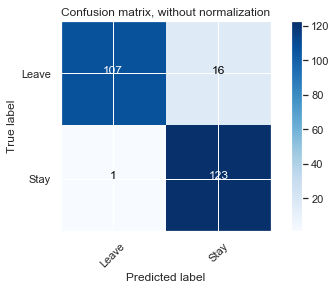

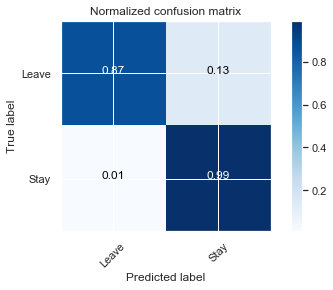

In [18]:
######################################## confusion matrix #####################################
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


print('performance of best model with k=1 on the test set')
print('parameters: k=1, p=1, weights=uniform')
# Plot non-normalized confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix ,classes = ['Leave','Stay'], 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Leave','Stay'], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Learning curve

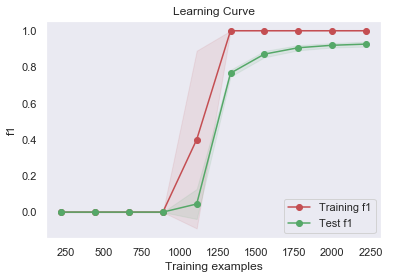

In [24]:
############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("f1")             #x label title
    
    # Class 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,scoring='f1', n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training f1")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test f1")

    plt.legend(loc=4) # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

########################### Visualization of Learning Curves ###########################

# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# kNN classifier class
from sklearn import neighbors
import matplotlib.pyplot as plt

title = "Learning Curve"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator =  KNeighborsClassifier(n_neighbors=1,
                            p=1,
                            metric='minkowski') 
plot_learning_curve(estimator, title, X_balstd, y_bal, ylim=None, cv=inner_cv,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10))
plt.show() # Display the figure

## Fitting graph

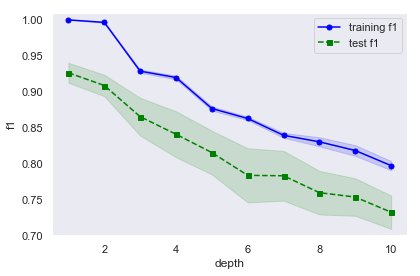

In [23]:
############################### Import Libraries & Modules #################################

# Fitting curve (aka validation curve)
# Determine training and test scores for varying parameter values.
from sklearn.model_selection import validation_curve
# Split validation
from sklearn.model_selection import train_test_split
# Class for Logistic Regression classifier
from sklearn.linear_model import LogisticRegression 

np.random.seed(42) #the seed used by the random number generator for np

############################# Parameters - Varying Complexity #############################

param_range = [1,2,3,4,5,6,7,8,9,10]


########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=KNeighborsClassifier(
                            p=1,
                            metric='minkowski'),
                X=X_balstd, 
                y=y_bal, 
                param_name="n_neighbors",
                param_range=param_range,
                cv=inner_cv,     #10-fold cross-validation
                scoring="f1", 
                n_jobs=-1)


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='test f1')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
#plt.xscale('log')
plt.legend(loc='higher right')
plt.xlabel('depth')
plt.ylabel('f1')
plt.ylim([0.7, 1.01]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure
